# Compare the Search Behavior of Deterministic vs Stochastic activity

In [49]:
import sys
if 'init_modules' in globals().keys():
    # second or subsequent run: remove all but initially loaded modules
    for m in sys.modules.keys():
        if m not in init_modules:
            del(sys.modules[m])
else:
    # first run: find out which modules were initially loaded
    init_modules = sys.modules.keys()
import numpy as np
from scipy import signal
from scipy import interpolate
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import pyfilaments.analysisutils as analysis
from pyfilaments._def_analysis import *
import pandas as pd
import h5py

from joblib import Parallel, delayed
import multiprocessing
%matplotlib notebook
plt.close('all')
# Create a folder for storing Publication figures
publication_figures = '/home/deepak/Dropbox/LacryModeling/ActiveFilamentsManuscript/Figures/Figure5'

if not os.path.exists(publication_figures):
    os.makedirs(publication_figures)

import _figure_parameters

## Load the data for deterministic and stochastic simulations

In [63]:
# Deterministic profile data
data_folders = ['/home/deepak/ActiveFilamentsSearch_backup_3/StochasticActivity/DeterministicActivity']

# Find all analysis data files and create a list
files_list = []
 # Walk through the folders and identify the simulation data files

for data_folder in data_folders:
    for dirs, subdirs, files in os.walk(data_folder, topdown=False):

        root, subFolderName = os.path.split(dirs)

        for fileNames in files:
            if(fileNames.endswith('csv') and fileNames[0] != '.' and 'analysis' in fileNames and 'ic' not in fileNames):
                files_list.append(os.path.join(dirs,fileNames))


print('No:of files: {}'.format(len(files_list)))

# Collect all data into a single data frame
df = pd.DataFrame({})

for file in files_list:
    
    df = df.append(pd.read_csv(file))
    
df_subset = df.loc[df['simulation completed']==True]

No:of files: 60


In [64]:
# Load the stochastic sim data
data_folders_stochastic = ['/home/deepak/ActiveFilamentsSearch_backup_3/StochasticActivity/NormalDistribution/noise_0_05', '/home/deepak/ActiveFilamentsSearch_backup_3/StochasticActivity/NormalDistribution/noise_01', '/home/deepak/ActiveFilamentsSearch_backup_3/StochasticActivity/NormalDistribution/noise_02']

# Find all analysis data files and create a list
files_list = []
 # Walk through the folders and identify the simulation data files

for data_folder in data_folders_stochastic:
    for dirs, subdirs, files in os.walk(data_folder, topdown=False):

        root, subFolderName = os.path.split(dirs)

        for fileNames in files:
            if(fileNames.endswith('csv') and fileNames[0] != '.' and 'analysis' in fileNames and 'ic' not in fileNames):
                files_list.append(os.path.join(dirs,fileNames))


print('No:of files: {}'.format(len(files_list)))

# Collect all data into a single data frame
df_stochastic = pd.DataFrame({})

for file in files_list:
    
    df_stochastic = df_stochastic.append(pd.read_csv(file))
    
df_subset_stochastic = df_stochastic.loc[df_stochastic['simulation completed']==True]

No:of files: 180


In [55]:
df_stochastic

,Unnamed: 0,N particles,radius,bond length,spring constant,kappa_hat,force strength,stresslet strength,potDipole strength,simulation type,...,viscosity,period,threshold index,simulation completed,periodic dynamics,max unique locations,activity cycles completed,search efficiency,activity type,noise scale
0,0,32,1,2.1,25,6.25,0,0,1.289474,point,...,0.166667,NaN,0,True,False,317.0,500,0.011044,normal,0.05
0,0,32,1,2.1,25,6.25,0,0,1.289474,point,...,0.166667,NaN,0,True,False,314.0,500,0.010884,normal,0.05
0,0,32,1,2.1,25,6.25,0,0,1.289474,point,...,0.166667,NaN,0,True,False,324.0,499,0.011295,normal,0.05
0,0,32,1,2.1,25,6.25,0,0,2.868421,point,...,0.166667,NaN,0,False,False,441.0,8,0.236521,normal,0.05
0,0,32,1,2.1,25,6.25,0,0,2.868421,point,...,0.166667,NaN,0,False,False,415.0,10,0.214586,normal,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,32,1,2.1,25,6.25,0,0,1.947368,point,...,0.166667,NaN,0,False,False,551.0,35,0.133090,normal,0.20
0,0,32,1,2.1,25,6.25,0,0,1.947368,point,...,0.166667,NaN,0,False,False,667.0,52,0.111860,normal,0.20
0,0,32,1,2.1,25,6.25,0,0,2.342105,point,...,0.166667,NaN,0,False,False,427.0,17,0.169729,normal,0.20
0,0,32,1,2.1,25,6.25,0,0,2.342105,point,...,0.166667,NaN,0,False,False,470.0,15,0.195401,normal,0.20


### Rescale unique locations visited as percent of maximum

In [65]:
# Max no:of unique locations possible
Np = 32
b0 = 2.1
L = (Np-1)*b0
max_unique_locations = int((L)**2)

print('Max possible unique locations: {}'.format(max_unique_locations))

df['Max locs percent'] = 100*df['max unique locations']/max_unique_locations
df_stochastic['Max locs percent'] = 100*df_stochastic['max unique locations']/max_unique_locations

df_subset['Max locs percent'] = 100*df_subset['max unique locations']/max_unique_locations
df_subset_stochastic['Max locs percent'] = 100*df_subset_stochastic['max unique locations']/max_unique_locations

Max possible unique locations: 4238


## Plot Search metrics vs parameter for determinstic vs Stochastic activity profiles

<IPython.core.display.Javascript object>


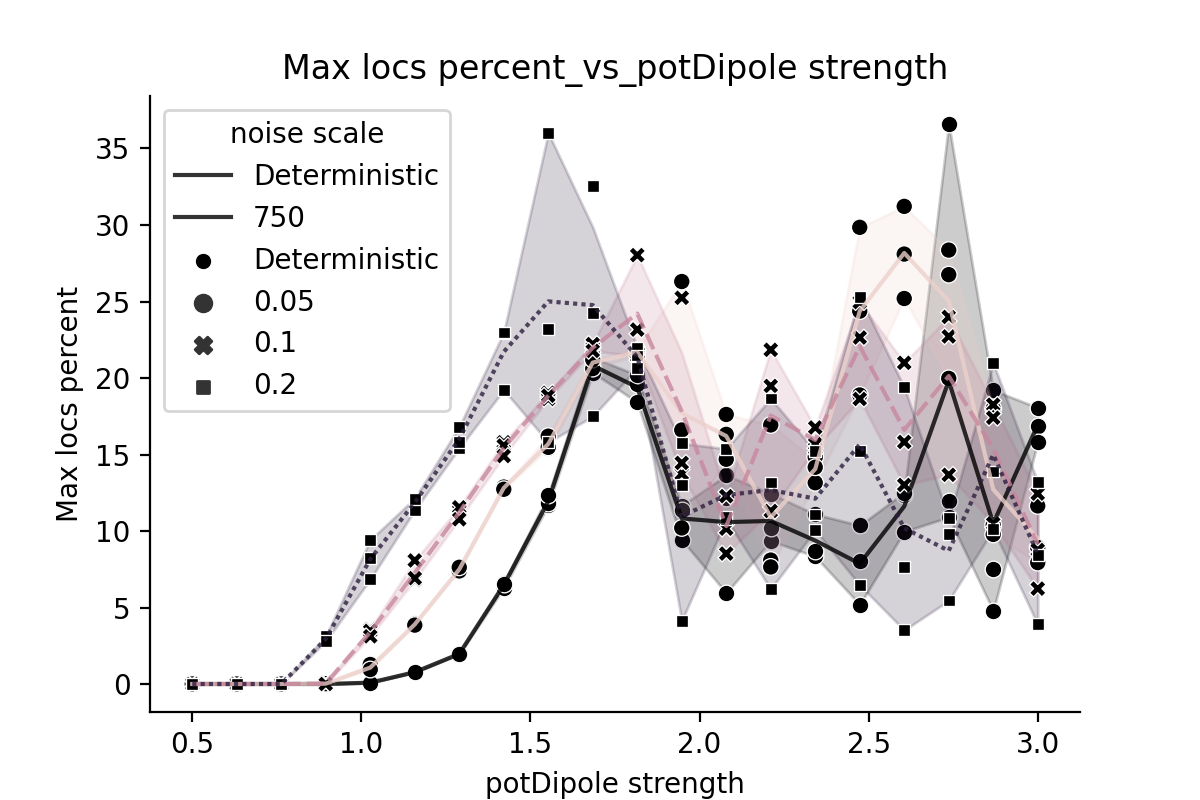

In [72]:
save = False
y_axis = 'Max locs percent'
# y_axis = 'search efficiency'

plt.style.use('default')

note = 'deterministic vs stochastic'
title = y_axis+'_vs_' +parameter
plt.figure(figsize=(6, 4))

ax1 = sns.lineplot(data=df, x= parameter, y= y_axis, style=" activity time scale", markers=None, ci=95, err_style = 'band', color = 'k', alpha =0.8, label = 'Deterministic')

ax2 = sns.scatterplot(data=df, x= parameter, y=y_axis, color = 'k', label = 'Deterministic', marker = 'o', legend = False)

ax3 = sns.lineplot(data=df_stochastic, x= parameter, y=y_axis, hue = "noise scale", style="noise scale", markers=None, ci=95, err_style = 'band', color = 'r', alpha =0.8, legend = False)

ax4 = sns.scatterplot(data=df_stochastic, x= parameter, y=y_axis, style = "noise scale", color = 'k')

# ax.set_xscale('log')
plt.title(title)

sns.despine(right=True, top=True)

if save:
    plt.savefig(os.path.join(publication_figures, title + '.png'), dpi = 300)
    plt.savefig(os.path.join(publication_figures, title + '.svg'), dpi = 300)

plt.show()

### Plot only data where simulation was completed

<IPython.core.display.Javascript object>


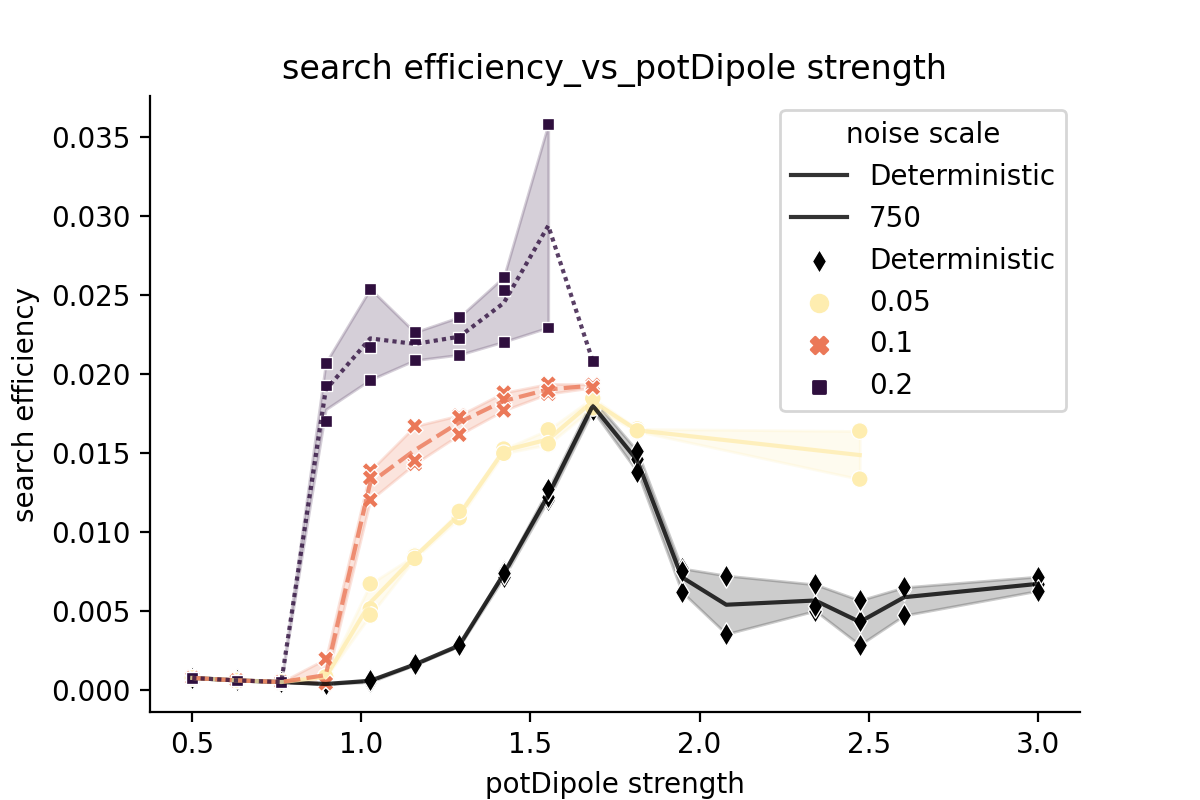

In [77]:
save = True
# y_axis = 'Max locs percent'
y_axis = 'search efficiency'

plt.style.use('default')

note = 'deterministic vs stochastic'
title = y_axis+'_vs_' +parameter
plt.figure(figsize=(6, 4))

ax1 = sns.lineplot(data=df_subset, x= parameter, y= y_axis, style=" activity time scale", markers=None, ci=95, err_style = 'band', color = 'k', alpha =0.8, label = 'Deterministic')

ax2 = sns.scatterplot(data=df_subset, x= parameter, y=y_axis, color = 'k', label = 'Deterministic', marker = 'd', legend = False)

ax3 = sns.lineplot(data=df_subset_stochastic, x= parameter, y=y_axis, hue = "noise scale", style="noise scale", markers=None, ci=95, err_style = 'band', color = 'r', alpha =0.8, legend = False, palette = ACTIVITY_STRENGTH_CMAP)

ax4 = sns.scatterplot(data=df_subset_stochastic, x= parameter, y=y_axis, hue = "noise scale", style = "noise scale", palette = ACTIVITY_STRENGTH_CMAP)

# ax.set_xscale('log')
plt.title(title)

sns.despine(right=True, top=True)

if save:
    plt.savefig(os.path.join(publication_figures, title + '.png'), dpi = 300)
    plt.savefig(os.path.join(publication_figures, title + '.svg'), dpi = 300)

plt.show()

### Plot the distribution of activity time-scales

<IPython.core.display.Javascript object>


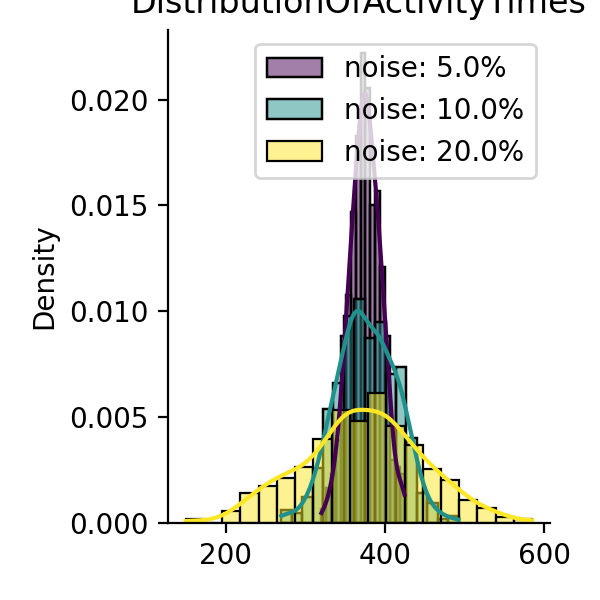

In [89]:
activity_timescale = 750
noise_scale_array = [0.05, 0.1, 0.2]
duty_cycle = 0.5
n_cycles = 500
T_comp_mean = (1 - duty_cycle)*activity_timescale


cmap = plt.cm.get_cmap('viridis', 255)
# cmap = sns.color_palette()
colors = [cmap(ii) for ii in np.linspace(0,1,len(noise_scale_array))]

plt.figure(figsize=(3,3))
title = 'DistributionOfActivityTimes'
for ii, noise_scale in enumerate(noise_scale_array):
    
# We create random times for one extra cycle so as to handle cases where Tf is higher than the mean value of n_cycles*(T_ext_mean + T_comp_mean)
    T_comp = np.random.normal(loc = T_comp_mean , scale = noise_scale*T_comp_mean, size = n_cycles)
    
    sns.histplot(x = T_comp, kde = True, color = colors[ii], stat = 'density', label = 'noise: {}%'.format(100*noise_scale))

plt.tight_layout()
plt.legend()
plt.title(title)
sns.despine(right=True, top=True)

if save:
    plt.savefig(os.path.join(publication_figures, title + '.png'), dpi = 300)
    plt.savefig(os.path.join(publication_figures, title + '.svg'), dpi = 300)

plt.show()